In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset
df = pd.read_csv(r"C:/Users/Rigo/results.csv")
# And a quick look at it
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
# Check that it's a complete dataset
df.isnull().any().any()

False

In [4]:
# Two functions that will return the winning and losing teams for the round, as well as a draw if that's the case
# Will make analysis quite a bit easier since we can now just count how many times a team appears as a winner
def game_outcome_winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return 'D'

def game_outcome_loser(row):
    if row['home_score'] > row['away_score']: return row['away_team']
    elif row['home_score'] < row['away_score']: return row['home_team']
    else: return 'D'

df['winner'] = df.apply(lambda row: game_outcome_winner(row), axis=1)
df['loser'] = df.apply(lambda row: game_outcome_loser(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,D
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


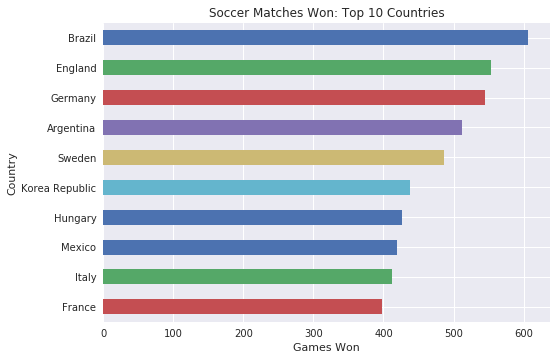

In [5]:
# This command drops the 'Draw' results and displays the top 10 most winning teams in history
winning_team = pd.value_counts(df.winner).drop('D')
winning_team = winning_team[:10]
with plt.style.context('seaborn'):
    winning_team.plot(kind='barh')
    plt.xlabel('Games Won')
    plt.ylabel('Country')
    plt.title('Soccer Matches Won: Top 10 Countries')
    plt.gca().invert_yaxis()    

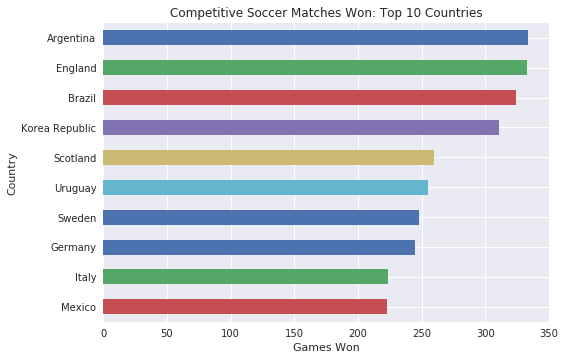

In [6]:
# How about just competitive matches - no friendlies
non_friendlies = df[df.tournament != 'Friendly']
winning_team_nf = pd.value_counts(non_friendlies.winner).drop('D')
winning_team_nf = winning_team_nf[:10]
with plt.style.context('seaborn'):
    winning_team_nf.plot(kind='barh')
    plt.xlabel('Games Won')
    plt.ylabel('Country')
    plt.title('Competitive Soccer Matches Won: Top 10 Countries')
    plt.gca().invert_yaxis()  

In [7]:
# Let's get a column of the year the match was played in
df['year'] = df['date'].map(lambda x: int(str(x)[:4]))

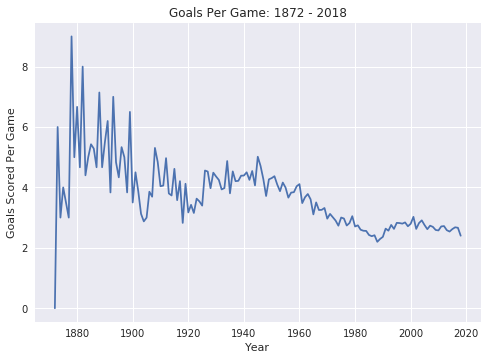

In [8]:
# Now we can analyze how the goal per game ratio has changed over time
df['gpm'] = df.home_score + df.away_score
goals_per_game = df.groupby('year').gpm.mean()
with plt.style.context('seaborn'):
    goals_per_game.plot()
    plt.xlabel('Year')
    plt.ylabel('Goals Scored Per Game')
    plt.title('Goals Per Game: 1872 - 2018')

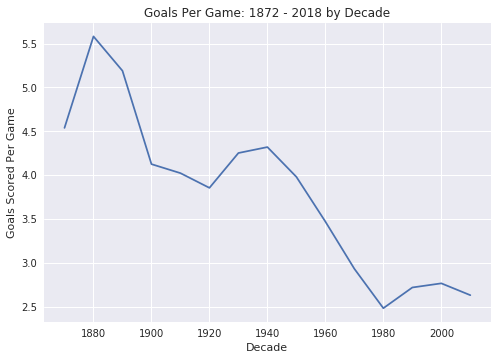

In [9]:
# Same thing, but by decade instead to remove some of the noise
df['decade'] = df['date'].map(lambda x: int(str(x)[:3])) * 10
df['gpm'] = df.home_score + df.away_score
goals_per_game = df.groupby('decade').gpm.mean()
with plt.style.context('seaborn'):
    goals_per_game.plot()
    plt.xlabel('Decade')
    plt.ylabel('Goals Scored Per Game')
    plt.title('Goals Per Game: 1872 - 2018 by Decade')

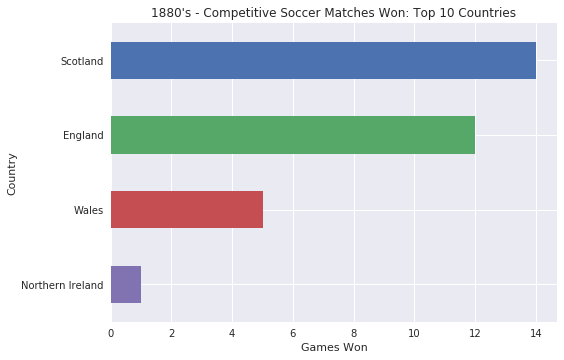

In [10]:
# A copy of the dataset with the decades column and without any friendlies:
wins = df[df.tournament != 'Friendly']

# Create a function that accepts the inputted decade, sum up the wins by country, drop the draws and leave only the top 10
def wins_per_decade(year):
    wins_decade = wins[wins.decade == year]
    wins_decade = pd.value_counts(wins_decade.winner)
    wins_decade = wins_decade.drop('D')
    wins_decade = wins_decade[:10]
    return (wins_decade)

# Let's check that it works real quick and plot it
wins_1880 = wins_per_decade(1880)

with plt.style.context('seaborn'):
    wins_1880.plot(kind='barh')
    plt.xlabel('Games Won')
    plt.ylabel('Country')
    plt.title("1880's - Competitive Soccer Matches Won: Top 10 Countries")
    plt.gca().invert_yaxis()  

In [11]:
# Now that we know it works for an individual decade, let's apply it to our whole dataset
# First, a unique vector of all values in our 'decade' column and then let's write a quick 'for' loop and write our top 10 lists to a dictionary

year_vector = wins.decade.unique()
d = {}

for row in year_vector:
    d["wins_" + str(row)] = wins_per_decade(row)

In [12]:
# And let's create a quick function that will make a nice looking graph for each year

def graph(year):
    with plt.style.context('seaborn'):
        d["wins_" + str(year)].plot(kind='barh')
        plt.xlabel('Games Won')
        plt.ylabel('Country')
        plt.title(str(year) + "'s - Competitive Soccer Matches Won: Top 10 Countries")
        plt.gca().invert_yaxis() 

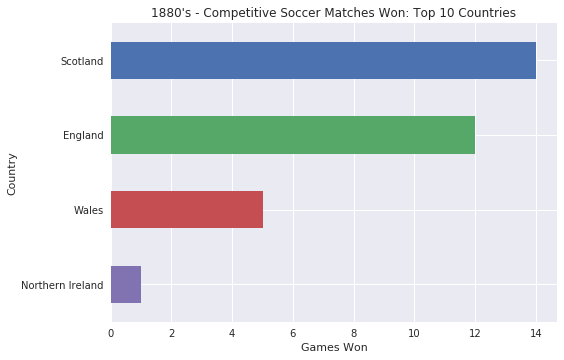

In [13]:
graph(1880)

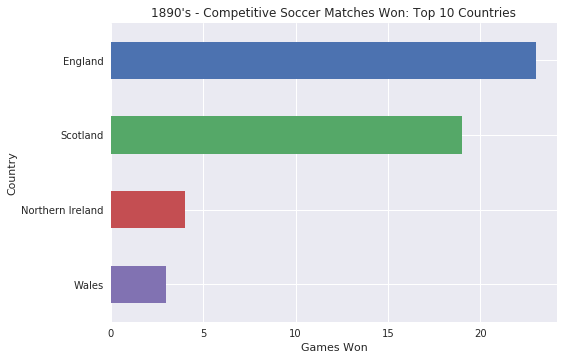

In [14]:
graph(1890)

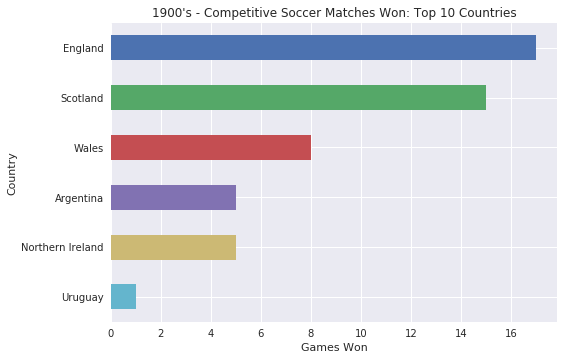

In [15]:
graph(1900)

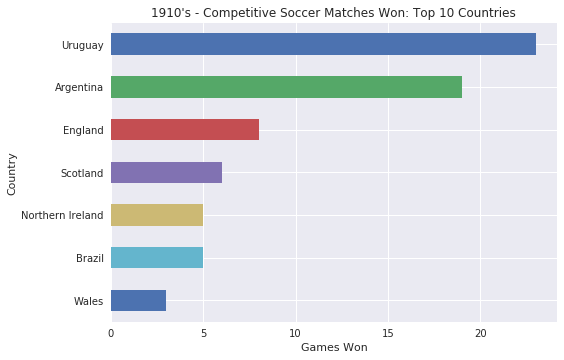

In [16]:
graph(1910)

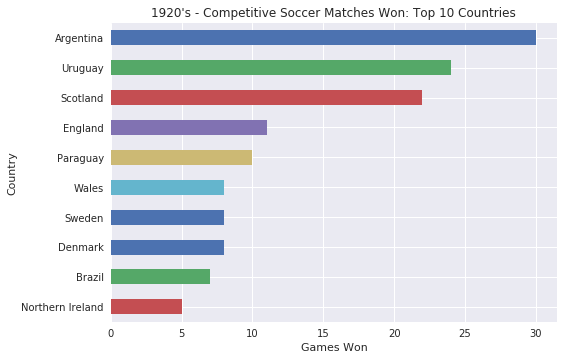

In [17]:
graph(1920)

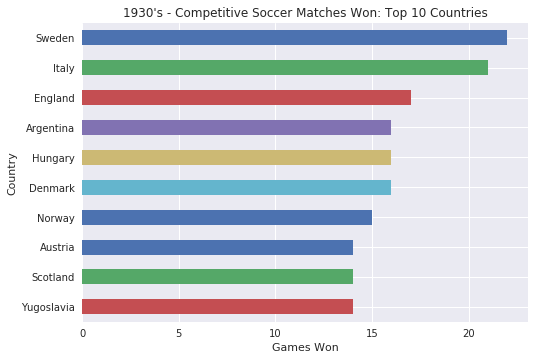

In [18]:
graph(1930)

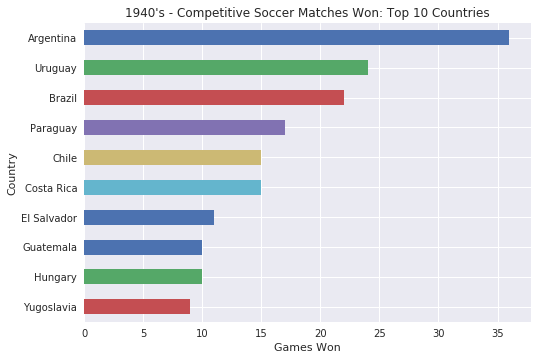

In [19]:
graph(1940)
#Unsurprising that there are almost no european nations in the top 10 in the 1940's

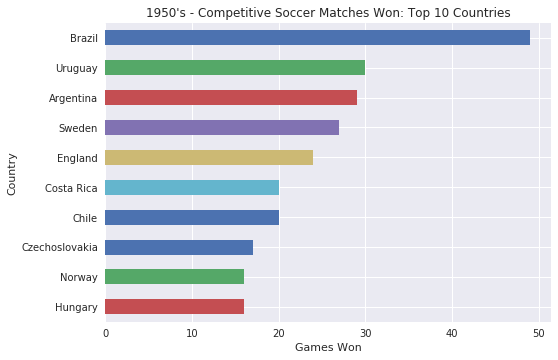

In [20]:
graph(1950)

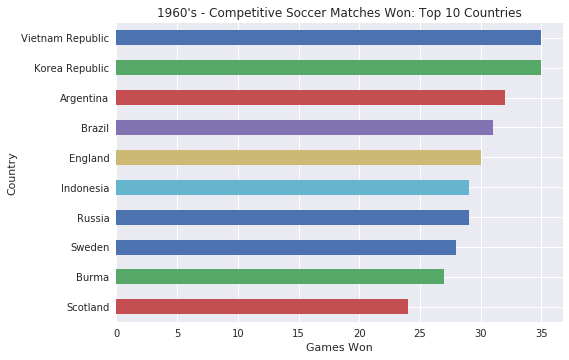

In [21]:
graph(1960)

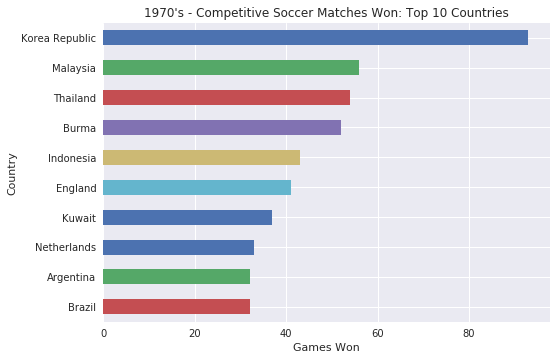

In [22]:
graph(1970)

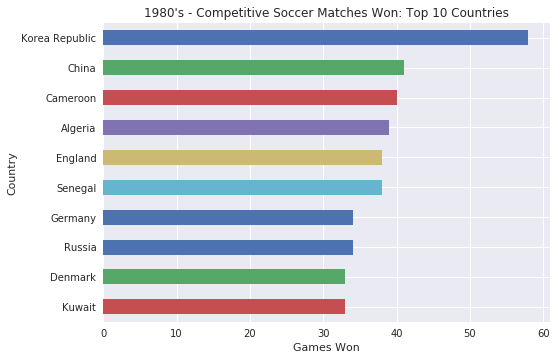

In [23]:
graph(1980)

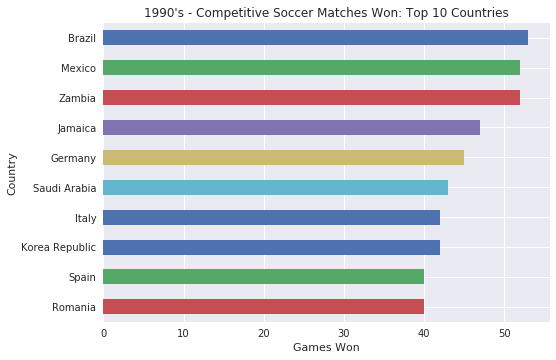

In [24]:
graph(1990)

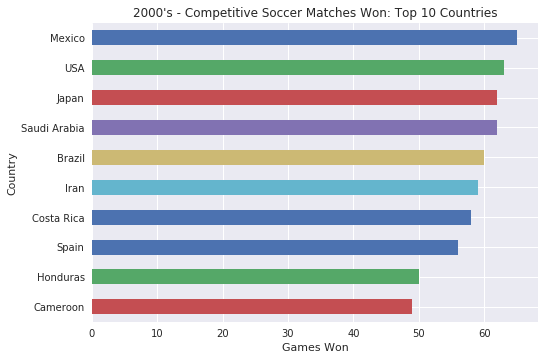

In [25]:
graph(2000)

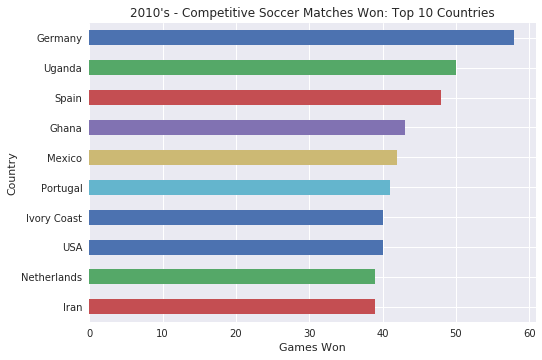

In [26]:
graph(2010)